# Hepstat_Tutorial_Roofit
Fit examples with RooFit, composite p.d.f with signal and background component
```
pdf = f_bkg * bkg(x,a0,a1) + (1-fbkg) * (f_sig1 * sig1(x,m,s1 + (1-f_sig1) * sig2(x,m,s2)))
```
 with following objectives:
 * Construct a simple fit in RooFit and plot the NLL
 * Compare binned and unbinned fit results
 * Compare un-extended and extended likelihoof it


Modified from [rf201_composite.py](https://root.cern/doc/master/rf201__composite_8py.html)


**Author:** Lailin XU  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Monday, March 29, 2021 at 03:45 PM.</small></i>

Import the ROOT libraries

In [1]:
import ROOT as R
from math import pow, sqrt
R.gROOT.SetStyle("ATLAS")

Welcome to JupyROOT 6.22/07


Setup component pdfs
---------------------------------------

Declare observable x

  [RooRealVar](https://root.cern.ch/doc/master/classRooRealVar.html) (const char *name, const char *title, Double_t minValue, Double_t maxValue, const char *unit="")

In [2]:
x = R.RooRealVar("x", "x", 0, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create two Gaussian PDFs g1(x,mean1,sigma) anf g2(x,mean2,sigma) and
their parameters

In [3]:
mean = R.RooRealVar("mean", "mean of gaussians", 5)
sigma1 = R.RooRealVar("sigma1", "width of gaussians", 0.5)
sigma2 = R.RooRealVar("sigma2", "width of gaussians", 1)

sig1 = R.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = R.RooGaussian("sig2", "Signal component 2", x, mean, sigma2)

Build Chebychev polynomial p.d.f.

In [4]:
a0 = R.RooRealVar("a0", "a0", 0.5, 0., 1.)
a1 = R.RooRealVar("a1", "a1", -0.2, 0., 1.)
bkg = R.RooChebychev("bkg", "Background", x, R.RooArgList(a0, a1))

Full model: the total PDF
------------------------------------------
Sum the signal components into a composite signal p.d.f.. Here we use [RooAddPdf](https://root.cern.ch/doc/master/classRooAddPdf.html)
  RooAddPdf (const char *name, const char *title, const RooArgList &pdfList, const RooArgList &coefList, Bool_t recursiveFraction=kFALSE)

In [5]:
sig1frac = R.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.8, 0., 1.)
sig = R.RooAddPdf("sig", "Signal", R.RooArgList(sig1, sig2), R.RooArgList(sig1frac))

Sum the composite signal and background

In [6]:
bkgfrac = R.RooRealVar("bkgfrac", "fraction of background", 0.5, 0., 1.)
model = R.RooAddPdf("model", "g1+g2+a", R.RooArgList(bkg, sig), R.RooArgList(bkgfrac))

A quick look at the model

In [7]:
model.Print()

RooAddPdf::model[ bkgfrac * bkg + [%] * sig ] = 1


Sample, fit and plot model
---------------------------------------------------

In [8]:
myc = R.TCanvas("c", "c", 800, 600)
myc.SetFillColor(0)
myc.cd()

Generate a toy data sample of 1000 events in x from model

 [RooAbsPdf::generate](https://root.cern.ch/doc/master/classRooAbsPdf.html), this will generate *unbinned* data, see [RooDataSet](https://root.cern.ch/doc/master/classRooDataSet.html)

In [9]:
data = model.generate(R.RooArgSet(x), 1000)

Fit model to data

In [10]:
model.fitTo(data)

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (sig1,sig2)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bkg)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 a1           0.00000e+00  1.00000e-01    0.00000e+00  1.00000e+00
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 BROUGHT BACK INSIDE LIMITS.
     3 bkgfrac      5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     4 sig1frac     8.00000e-01  1.00000e

Plot data and PDF overlaid

In [11]:
xframe = x.frame(R.RooFit.Title("Example of composite pdf=(sig1+sig2)+bkg"))
data.plotOn(xframe, R.RooFit.Name('Data'))
model.plotOn(xframe, R.RooFit.Name('Full_Model'), R.RooFit.LineColor(R.kBlue))
xframe.Draw()
ymax = xframe.GetMaximum()
xframe.SetMaximum(ymax*1.2)

Overlay the background component of model with a dashed line

In [12]:
ras_bkg = R.RooArgSet(bkg)
model.plotOn(xframe, R.RooFit.Components(ras_bkg), R.RooFit.LineStyle(R.kDashed), R.RooFit.LineColor(R.kRed), R.RooFit.Name('Bkg'))
xframe.Draw()

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Overlay the signal components of model with a dotted line

In [13]:
ras_sig1 = R.RooArgSet(sig1)
model.plotOn(xframe, R.RooFit.Components(ras_sig1), R.RooFit.LineStyle(R.kDotted), R.RooFit.LineColor(R.kMagenta), R.RooFit.Name('Sig1'))
xframe.Draw()
ras_sig2 = R.RooArgSet(sig2)
model.plotOn(xframe, R.RooFit.Components(ras_sig2), R.RooFit.LineStyle(R.kDotted), R.RooFit.LineColor(R.kGreen+2), R.RooFit.Name('Sig2'))
xframe.Draw()

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (sig1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (sig)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (sig2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (sig)


Overlay the background+sig2 components of model with a dotted line

In [14]:
ras_bkg_sig2 = R.RooArgSet(bkg, sig2)
model.plotOn(xframe, R.RooFit.Components(ras_bkg_sig2), R.RooFit.LineStyle(R.kDotted), R.RooFit.LineColor(R.kCyan), R.RooFit.Name('Sig2Bkg'))

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg,sig2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (sig)


Draw legends

In [15]:
lIy = 0.92
lg = R.TLegend(0.60, lIy-0.25, 0.85, lIy)
lg.SetBorderSize(0)
lg.SetFillStyle(0)
lg.SetTextFont(42)
lg.SetTextSize(0.04)
lg.AddEntry(xframe.findObject("Data"), 'Data', 'p')
lg.AddEntry(xframe.findObject("Full_Model"), 'Full model (Sig1+Sig2+Bkg)', 'l')
lg.AddEntry(xframe.findObject("Bkg"), 'Bkg', 'l')
lg.AddEntry(xframe.findObject("Sig1"), 'Sig1', 'l')
lg.AddEntry(xframe.findObject("Sig2"), 'Sig2', 'l')
lg.Draw("same")

Show fit results in the canvas

In [16]:
xlab0, ylab0=0.18, 0.90
fv1 = R.TPaveText(xlab0, ylab0, xlab0+0.20, 0.75,"NDC")
fv1.SetBorderSize(0)
fv1.SetFillStyle(0)
fv1.SetTextAlign(11)
fv1.SetTextSize(0.030)
fv1.AddText("{0:s} = {1:.2f} #pm {2:.2f}".format(bkgfrac.GetTitle(), bkgfrac.getVal(), bkgfrac.getError()))
fv1.AddText("{0:s} = {1:.2f} #pm {2:.2f}".format(sig1frac.GetTitle(), sig1frac.getVal(), sig1frac.getError()))
fv1.Draw("same")

myc.Update()
myc.SaveAs("test_roofit_1.png")

Info in <TCanvas::Print>: png file test_roofit_1.png has been created


Questions:
---------------------------------------------------
  * What are the free parameters of our model?
  * Now suppose the background modelling is well controled from a side-band, for both its normalization and shape. Do the fit again.
---------------------------------------------------

Do fitting with Binned data
---------------------------------------------------

Create a binned data

In [17]:
data.Print("v")
x.setBins(10)
dh = R.RooDataHist("dh", "binned version of d", R.RooArgSet(x), data)
dh.Print("v")

xframe2 = x.frame(R.RooFit.Title("Binned data"))
dh.plotOn(xframe2, R.RooFit.LineColor(R.kRed), R.RooFit.MarkerColor(R.kRed), R.RooFit.Name('hData'))

myc.Clear()
xframe2.Draw()

DataStore modelData (Generated From g1+g2+a)
  Contains 1000 entries
  Observables: 
    1)  x = 4.87104  L(0 - 10)  "x"
DataStore dh (binned version of d)
  Contains 10 entries
  Observables: 
    1)  x = 4.87104  L(0 - 10) B(10)  "x"
Binned Dataset dh (binned version of d)
  Contains 10 bins with a total weight of 1000
  Observables:     1)  x = 4.87104  L(0 - 10) B(10)  "x"


Do the fitting again

In [18]:
model.fitTo(dh)

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (sig1,sig2)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bkg)
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           5.07642e-01  7.95738e-02    0.00000e+00  1.00000e+00
     2 a1           2.66515e-01  1.33780e-01    0.00000e+00  1.00000e+00
     3 bkgfrac      4.27793e-01  3.55511e-02    0.00000e+00  1.00000e+00
     4 sig1frac     6.41234e-01  9.67457e-02    0.00000e+00  1.00000e+00
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SP

Plot data and PDF overlaid

In [19]:
model.plotOn(xframe2, R.RooFit.Name('hFull_Model'), R.RooFit.LineColor(R.kBlue))
xframe2.Draw()
ymax = xframe2.GetMaximum()
xframe2.SetMaximum(ymax*1.2)

Overlay the background component of model with a dashed line

In [20]:
ras_bkg = R.RooArgSet(bkg)
model.plotOn(xframe2, R.RooFit.Components(ras_bkg), R.RooFit.LineStyle(R.kDashed), R.RooFit.LineColor(R.kRed), R.RooFit.Name('hBkg'))
xframe2.Draw()

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Overlay the signal components of model with a dotted line

In [21]:
ras_sig1 = R.RooArgSet(sig1)
model.plotOn(xframe2, R.RooFit.Components(ras_sig1), R.RooFit.LineStyle(R.kDotted), R.RooFit.LineColor(R.kMagenta), R.RooFit.Name('hSig1'))
xframe2.Draw()
ras_sig2 = R.RooArgSet(sig2)
model.plotOn(xframe2, R.RooFit.Components(ras_sig2), R.RooFit.LineStyle(R.kDotted), R.RooFit.LineColor(R.kGreen+2), R.RooFit.Name('hSig2'))
xframe2.Draw()

lg.Clear()
lg.AddEntry(xframe2.findObject("hData"), 'Data', 'p')
lg.AddEntry(xframe2.findObject("hFull_Model"), 'Full model (Sig1+Sig2+Bkg)', 'l')
lg.AddEntry(xframe2.findObject("hBkg"), 'Bkg', 'l')
lg.AddEntry(xframe2.findObject("hSig1"), 'Sig1', 'l')
lg.AddEntry(xframe2.findObject("hSig2"), 'Sig2', 'l')
lg.Draw("same")

fv1.Clear()
fv1.AddText("{0:s} = {1:.2f} #pm {2:.2f}".format(bkgfrac.GetTitle(), bkgfrac.getVal(), bkgfrac.getError()))
fv1.AddText("{0:s} = {1:.2f} #pm {2:.2f}".format(sig1frac.GetTitle(), sig1frac.getVal(), sig1frac.getError()))
fv1.Draw("same")


myc.Update()
myc.SaveAs("test_roofit_2.png")

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (sig1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (sig)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (sig2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (sig)


Info in <TCanvas::Print>: png file test_roofit_2.png has been created


Questions:
---------------------------------------------------
  * How the fit results are compared with the unbinned case?
  * How the fit results will change with different binning size?
---------------------------------------------------

Draw all canvases 

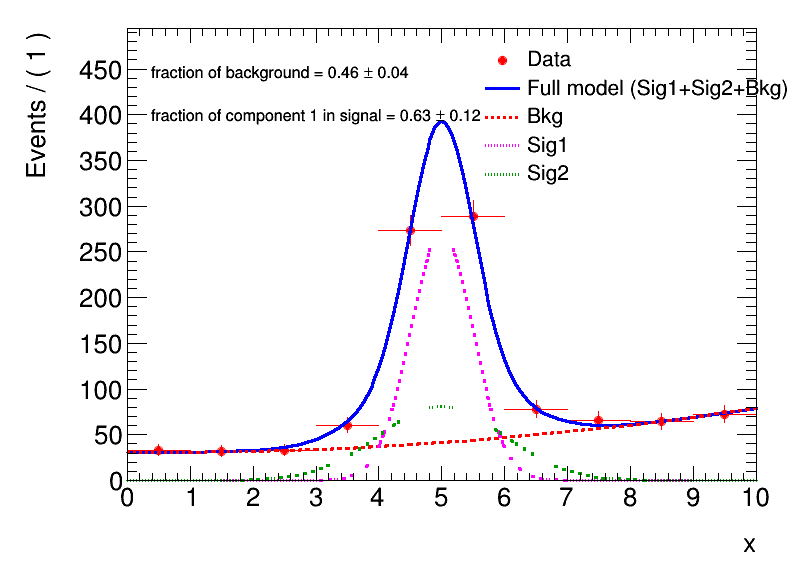

In [22]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()